In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def relu(z):
    return np.maximum(z, 0)

class SimpleNN:
    def __init__(self, b1, w1, b2, w2):
        self.b1 = b1
        self.w1 = w1
        self.b2 = b2
        self.w2 = w2

    def forward(self, x):
        h1 = relu(self.b1 + self.w1*x)
        h2 = relu(self.b2 + self.w2*h1)
        out = h2
        return out

In [3]:
# Ground truth params
b1_true = 0.5
w1_true = 1.0
b2_true = 1.0
w2_true = -1.0

model_gt = SimpleNN(b1_true, w1_true, b2_true, w2_true)

x = np.random.uniform(-1.0, 1.0, 100)
y_clean = model_gt.forward(x)

y = y_clean + 0.1 * np.random.randn(len(x))

In [4]:
def relu_deriv(z):
    return (z > 0).astype(float)

def mse(pred, target):
    e = pred - target
    return np.mean(e**2)

def train(initial_model, LR = 0.1, NUM_STEPS = 1000):
    
    model = initial_model
        
    m = len(x)
    mse_history = []

    for step in range(1, NUM_STEPS + 1):
        mse_history.append(mse(model.forward(x), y))
        
        ####################
        ## YOUR CODE HERE ##
        ####################
        pred = model.forward(x)
        a = relu_deriv(model.w2*relu(model.w1*x+model.b1)+model.b2)
        t = model.w1*x+model.b1
        
        db2 = 2*(pred-y)*a
        dJ_db2 = 1/m * np.sum(db2)
        
        dw2 = 2*(pred-y)*relu(t)*a
        dJ_dw2 = 1/m * np.sum(dw2)
        
        dw1 = 2*(pred-y)*model.w2*x*a*relu_deriv(t)
        dJ_dw1 = 1/m * np.sum(dw1)
        
        db1 = 2*(pred-y)*model.w2*a*relu_deriv(t)
        dJ_db1 = 1/m * np.sum(db1)
        
        
        model.w2 -= LR * dJ_dw2
        model.b2 -= LR * dJ_db2
        model.w1 -= LR * dJ_dw1
        model.b1 -= LR * dJ_db1
    return model, mse_history

Text(0, 0.5, 'empirical risk')

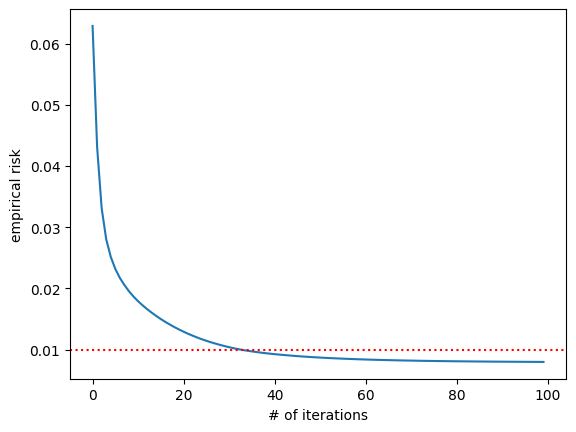

In [5]:

param_noise = 0.2 # add some small amount of noise to the TRUE model parameters
mse_history = []
init_model = SimpleNN(b1_true + param_noise*np.random.randn(),
                      w1_true + param_noise*np.random.randn(), 
                      b2_true + param_noise*np.random.randn(), 
                      w2_true + param_noise*np.random.randn())

trained_model, mse_history = train(NUM_STEPS=100,initial_model=init_model)

plt.plot(mse_history)
plt.axhline(y=0.01, color = 'r', linestyle=':')
plt.xlabel('# of iterations')
plt.ylabel('empirical risk')